# Minimax

O **Minimax** é um algoritmo clássico da Inteligência Artificial usado principalmente em jogos de dois jogadores, como **xadrez** e **jogo da velha**. Ele busca simular todos os movimentos possíveis, assumindo que:

- Você joga de forma **ótima** (quer maximizar sua chance de ganhar).
- Seu oponente também joga de forma **ótima** (quer minimizar sua chance de ganhar).

> O objetivo é **maximizar** o ganho mínimo garantido, daí o nome "Minimax"! 😉

## 🌳 Árvore de Decisão no Minimax

O Minimax constrói uma árvore de estados possíveis do jogo:

- Cada **nó** representa uma configuração do jogo.
- Cada **ramo** representa uma jogada possível.
- **Folhas** representam estados finais (vitória, derrota ou empate).

**Exemplo de árvore simplificada:**

```
                  (Você)
          /         |         \
     (Oponente) (Oponente) (Oponente)
        / \        / \        / \
      (F) (F)    (F) (F)    (F) (F)
(F = folha: vitória, empate ou derrota)
```

# Bibliotecas

In [11]:
#library para plot do grafo
import networkx as nx
#layout tipo arvore
from networkx.drawing.nx_pydot import graphviz_layout

#library para plot do grafo
import matplotlib.pyplot as plt

#biblioteca random
import random

## Exercício 1:

Gerar grafos aleatórios com branching factor b e profundidade d com valor para os elementos da sua base aleatórios de -10 até 10.

a) Para um dado depth factor `d` e para um Branching factor `b`, gere um codigo em python que produza um grafo, representando-o no formato lista de tuplas.

Ex: `[(1,2),(1,4), (4,5)....]`

Para o caso acima o nó 1 tem uma ligação com o nó dois e 4. O nó 4 tem uma ligação com o nó 5.

In [12]:
#funcao gera grafo
def generate_tree_graph(depth, branching_factor):
  #cria a lista de nomes de nós a partirt do b e do d
  list_nodes = sorted(list(range(sum([branching_factor**x for x in range(depth+1)]))),reverse=True)

  #lista das tuplas
  graph = []

  #input: d do grafo e b do grafo
  #output: lista de tuplas com nós numericos.

  #funcao recursiva
  def generate_edges(parent, current_depth,graph):
    #condiçao de saida da recursao
    #ele vai criando nós até que chegue no d esperado
    if current_depth == depth:
      return
    #para cada nó criado ele vai criar filhos com base no b
    for i in range(1, branching_factor + 1):

      # cria o nome do child
      child = list_nodes.pop(-1)
      #faz append da ligacao
      graph.append((parent, child))
      #gera um novo edge
      generate_edges(child, current_depth + 1,graph)

  #cria o primeiro nó de nome 1
  generate_edges(list_nodes.pop(-1), 0,graph)

  return graph

# Exemplo de uso:
depth = 3
branching_factor = 2
tree_graph = generate_tree_graph(depth, branching_factor)
print(tree_graph)


[(0, 1), (1, 2), (2, 3), (2, 4), (1, 5), (5, 6), (5, 7), (0, 8), (8, 9), (9, 10), (9, 11), (8, 12), (12, 13), (12, 14)]


b) Em seguinda atribua um valor (utility) ou um valor para os nós na base do grafo. Use um dicionário `labels_dic` para faze-lo. Comece aqui a trabalhar com a biblioteca `networkx` ela é especializada em grafos. (Dica: pesquise o método `.degree` de um grafo)

Ex: `{1:'', 2:'', 9:'',...}`

In [13]:
#cria o node
G = nx.DiGraph()

#insere os nós e os edges com base no grafo gerado acima
G.add_edges_from(tree_graph)
#cria o dicionário
labels_dic = {node:random.randint(-10, 10) if G.degree[node]==1 else None for node in G}
# labels_dic = {node:random.randint(-10, 10) for node in G}
# labels_dic


c) Agora vamos tentar imprimir o que gerou. Também faz parte tentar receber funções de outros programadores e tentar atender os parametros de entrada. Utilizando a funcao dada abaixo atenda os requisitos do input e veja o que acontece.

Nodes: [(0, {'value': None}), (1, {'value': None}), (2, {'value': None}), (3, {'value': -3}), (4, {'value': 0}), (5, {'value': None}), (6, {'value': 9}), (7, {'value': -5}), (8, {'value': None}), (9, {'value': None}), (10, {'value': -2}), (11, {'value': -1}), (12, {'value': None}), (13, {'value': 5}), (14, {'value': 5})]
Edges: [(0, 1), (0, 8), (1, 2), (1, 5), (2, 3), (2, 4), (5, 6), (5, 7), (8, 9), (8, 12), (9, 10), (9, 11), (12, 13), (12, 14)]


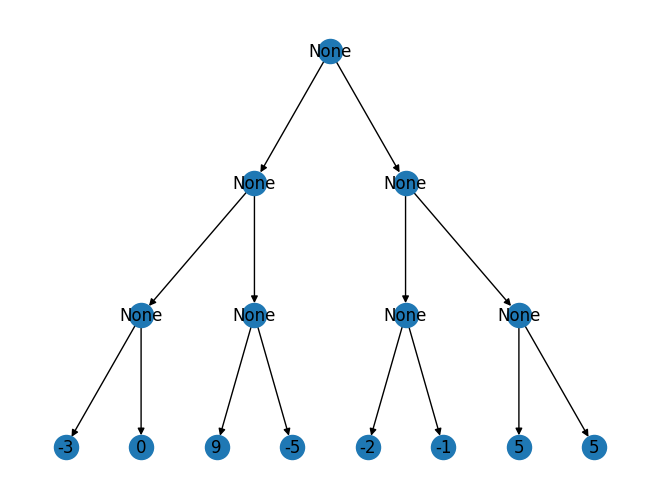

In [14]:
#funcao que printa o grafo
def print_grafo(graph,labels_dic,values=False):

  #parametros e entrada
  ######
  #list_edges deve ser uma lista de tuplas
  #list_edges = [(1,2),(3,4)....]
  #Cada edge representa uma ligacao entre nós
  #values (default False) é se quer imprimir o grafo com os nomes dos nós ou com seus valores atribuidos
  ######
  #labels_dic é um dicionário com o peso de cada nó
  #labels_dic = {1:4,2:2,3:5,....}

  #cria o node
  G = nx.DiGraph()

  #insere os nós e os edges
  G.add_edges_from(graph)

  #gera a posicao e organiza em arvore
  pos = graphviz_layout(G, prog="dot")

  for node in G:
    G.nodes[node]["value"] = labels_dic[node]

  # Printa a informacao do grafo (opcional)
  print("Nodes:", G.nodes(data=True))
  print("Edges:", G.edges())

  #faz plot
  if values:
    nx.draw(G, pos,with_labels=True,labels=labels_dic)
  else:
    nx.draw(G,pos,with_labels=True)

  plt.draw()
  plt.show()

  return G


G = print_grafo(tree_graph,labels_dic,True)

## Exercício 2:

Agora ja tem um bom grafo para trabalhar com minimax. crie uma função que receba como parâmetro o grafo que você criou acima, nó alvo e qual comportamento de jogador esse nó deve ter (max ou min). Sua função deve retornar qual jogada o jogador deve fazer logo a seguir o nó alvo.

In [15]:
print("Nodes:", G.nodes(data=True))
print("Edges:", G.edges())

Nodes: [(0, {'value': None}), (1, {'value': None}), (2, {'value': None}), (3, {'value': -3}), (4, {'value': 0}), (5, {'value': None}), (6, {'value': 9}), (7, {'value': -5}), (8, {'value': None}), (9, {'value': None}), (10, {'value': -2}), (11, {'value': -1}), (12, {'value': None}), (13, {'value': 5}), (14, {'value': 5})]
Edges: [(0, 1), (0, 8), (1, 2), (1, 5), (2, 3), (2, 4), (5, 6), (5, 7), (8, 9), (8, 12), (9, 10), (9, 11), (12, 13), (12, 14)]


In [ ]:
def minimax(G, n, player='maxplayer'):

    #recebe como parâmetro:
    #G = Grafo
    #n = nó analisado
    #player = caracteristica do player naquele nó


    return (best_move, bestv)

In [17]:
minimax(G, 0,'maxplayer')


Nó filho analisado: 1
Entrou no max eo valor analisado é (3, -3)
Entrou no max eo valor analisado é (4, 0)
No final ele optou por 0
Entrou no min eo valor analisado é (2, 0)
Entrou no max eo valor analisado é (6, 9)
Entrou no max eo valor analisado é (7, -5)
No final ele optou por 9
Entrou no min eo valor analisado é (5, 9)
No final ele optou por 0

Nó filho analisado: 8
Entrou no max eo valor analisado é (10, -2)
Entrou no max eo valor analisado é (11, -1)
No final ele optou por -1
Entrou no min eo valor analisado é (9, -1)
Entrou no max eo valor analisado é (13, 5)
Entrou no max eo valor analisado é (14, 5)
No final ele optou por 5
Entrou no min eo valor analisado é (12, 5)
No final ele optou por -1


(1, 0)

### Exercício 3
- O algoritmo Minimax pode ser muito lento para árvores grandes.

- **Poda Alfa-Beta** é uma técnica para acelerar a execução descartando ramos que não podem melhorar a decisão final.
Você irá implementar a versão otimizada agora.

In [ ]:
def minimax_alfa_beta(G, n, player='maxplayer'):
    pass

In [ ]:
minimax_alfa_beta(G, 0,'maxplayer')


Nó filho analisado: 1
Entrou no min eo valor analisado é (3, -3)
Entrou no min eo valor analisado é (4, 0)
No final ele optou por 0
Entrou no min eo valor analisado é (2, 0)
Entrou no min eo valor analisado é (6, 9)
>>>>>>aplicou poda
No final ele optou por 9
Entrou no min eo valor analisado é (5, 9)
No final ele optou por 0

Nó filho analisado: 8
Entrou no min eo valor analisado é (10, -2)
Entrou no min eo valor analisado é (11, -1)
No final ele optou por -1
Entrou no min eo valor analisado é (9, -1)
>>>>>>aplicou poda
No final ele optou por -1


(1, 0)